__Purpose:__ Test the performance of already trained decoders to see if they continue to achieve the best performance, and to see if personalization is necessary/possible.  Ideally, this NB should show that the outputs of previous training rounds will maintain their high performance.  I am ambivalent about whether or not we would expect any further improvement over training.

In [1]:
import pandas as pd
import os
import numpy as np
np.random.seed(0)
import random
random.seed(0)
from matplotlib import pyplot as plt
from scipy.optimize import minimize
import copy

from experiment_params import *
from cost_funcs import *
from fl_sim_client import *
from fl_sim_server import *
import time
import pickle
from sklearn.decomposition import PCA

from scipy.optimize import minimize, least_squares
from itertools import permutations

## Momona Formatting Code

import matplotlib as mpl
import seaborn as sns

fs = 16

#################################

preamble = r'\input{'+os.getcwd()+r'/macros}'
preamble = ''
#matplotlib.rcParams['text.latex.preamble'] = preamble
mpl.rcParams['text.latex.preamble'] = preamble

font = { 'size': fs, 'family': 'sans-serif', 'weight':'normal' }
mpl.rc('font', **font)

rc={'axes.labelsize': fs, 'font.size': fs, 'legend.fontsize': fs, 
    'axes.titlesize': fs,'xtick.labelsize': fs, 'ytick.labelsize': fs,
    'text.usetex':True,
    #'text.usetex':False,
    'pdf.fonttype':42}
mpl.rcParams.update(rc)

sns.set(rc=rc)

In [2]:
poster_path = r"C:\Users\kdmen\Desktop\Research\personalization-privacy-risk\599_PrivacyAnalysis\Poster_Plotting"
test_cost_df_FLSim_PCA10 = pd.read_csv(poster_path + r"\200P_test_cost_df_PCA10_yesEMGNorm_FLSim.csv")
print(test_cost_df_FLSim_PCA10.shape)
test_cost_df_FLSim_PCA10.drop('Unnamed: 0', axis=1, inplace=True)

(15, 16)


## Load Data

In [3]:
path = r'C:\Users\kdmen\Desktop\Research\Data'
cond0_filename = r'\cond0_dict_list.p'

with open(path+cond0_filename, 'rb') as fp:
    cond0_training_and_labels_lst = pickle.load(fp)
    
lr_df = pd.read_pickle(r'Saved_Metrics\104P_full_lr_df.pkl')
gbt_df_1ss = pd.read_pickle(r"Saved_Metrics\3004P_good_gbt_df.pkl")
global_lr_df_1ss = pd.read_pickle(r"Saved_Metrics\300P_global_lr_df.pkl")

## Setting Up Plotting

In [4]:
id2color = {0:'lightcoral', 1:'maroon', 2:'chocolate', 3:'darkorange', 4:'gold', 5:'olive', 6:'olivedrab', 
            7:'lawngreen', 8:'aquamarine', 9:'deepskyblue', 10:'steelblue', 11:'violet', 12:'darkorchid', 13:'deeppink'}
num_participants = 14

D_0_10 = np.random.rand(2,10)

total_num_updates = 19
final_training_update = 15
starting_update = 0 # This is not used anywhere else except directly below FYI 
num_updates = final_training_update - starting_update
dt = 1/60

step_indices = list(range(num_updates))

In [5]:
user_c0_1ScipyStep = [Client(i, D_0_10, 'EtaScipyMinStep', cond0_training_and_labels_lst[i], 'streaming', starting_update=0, set_alphaF_zero=True, delay_scaling=0, verbose=True) for i in range(14)]
global_model_1scipystep = Server(1, D_0_10, 'FedAvg', user_c0_1ScipyStep)

big_loop_iters = 600
for i in range(big_loop_iters):
    global_model_1scipystep.execute_FL_loop()


Client 1: New update after lrt passed: (new update, current global round, current local round): (1, 133, 50)

Client 1: New update after lrt passed: (new update, current global round, current local round): (2, 287, 100)

Client 1: New update after lrt passed: (new update, current global round, current local round): (3, 458, 150)

Client 1: New update after lrt passed: (new update, current global round, current local round): (4, 566, 200)



In [6]:
def moving_average(numbers, window_size):
    i = 0
    moving_averages = []
    while i < len(numbers) - window_size + 1:
        this_window = numbers[i : i + window_size]

        window_average = sum(this_window) / window_size
        moving_averages.append(window_average)
        i += window_size
    return moving_averages

## Plotting Cell

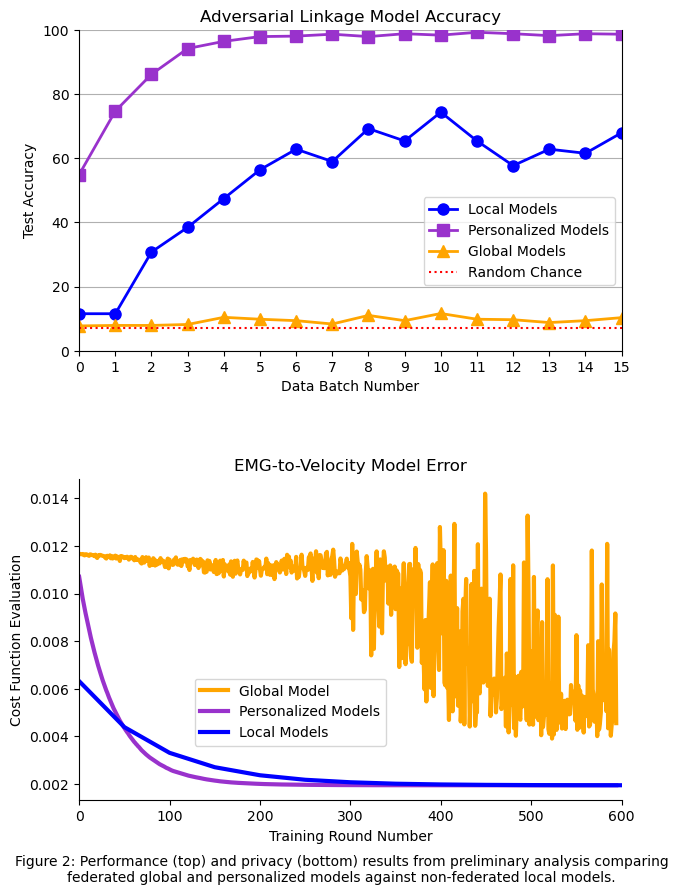

<Figure size 900x700 with 0 Axes>

In [7]:
start = 0
stop = 16
col_num = 1
my_x_updates = list(range(19))

fl_x_updates = list(range(19))
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(7,10), gridspec_kw={'hspace': 0.4})
marker_size = 8
my_line_width = 2

plt.figure(figsize=(9,7))
ax1.plot(fl_x_updates[:stop], lr_df.iloc[:stop, col_num], linewidth=my_line_width, marker='o', markersize=marker_size, color='blue', label='Local Models')
ax1.plot(fl_x_updates[:stop], gbt_df_1ss.iloc[:stop, col_num], linewidth=my_line_width, marker='s', markersize=marker_size, color='darkorchid', label='Personalized Models')
ax1.plot(fl_x_updates[:stop], global_lr_df_1ss.iloc[:stop, col_num], marker='^', markersize=marker_size, color='orange', linewidth=my_line_width, label='Global Models')

ax1.set_xticks(np.arange(0, stop, 1.0))
ax1.set_yticks(np.arange(0, 120, 20.0))
ax1.xaxis.set_tick_params()#labelsize=ticks_font_size)
ax1.yaxis.set_tick_params()#labelsize=ticks_font_size)
ax1.set_ylim(0, 100)
ax1.set_xlim(0, 15)
ax1.grid(axis='y')
ax1.set_xlabel('Data Batch Number')#, fontdict=axes_font)
ax1.set_ylabel('Test Accuracy')#, fontdict=axes_font)
#ax1.set_title('Adversarial Model Accuracy Per Data Batch', fontdict=title_font)

ax1.axhline(7.14, linestyle='dotted', color='red', label='Random Chance')

# use parameter bbox_to_anchor to reposition
# the legend box outside the plot area
#ax1.legend(loc='center right', bbox_to_anchor=(1, 0.315))
ax1.legend(loc='upper right', bbox_to_anchor=(1, 0.5))#, prop=legend_font)

ax1.set_title("Adversarial Linkage Model Accuracy")#, fontdict=title_font)

ax1.spines[['top']].set_visible(False)

################################################################################################

my_title = 'EMG-to-Velocity Model Error'
iterable_labels = ['Global Model', 'Personalized Models']

all_user_input = [user_c0_1ScipyStep]

plot_mean = True
plot_median = False
exclusion_ID_lst = []
dim_reduc_factor = 1
plot_this_ID_only = -1
global_error = True
local_error = True
different_local_round_thresh_per_client = False
legend_on = True
num_participants = 14
show_update_change = True
custom_title = ""
axes_off_list = []
xlim_max = None
xlim_min = None
ylim_max = None
ylim_min = None
input_linewidth = 3
my_legend_loc = 'best'
iterable_colors = []

plot_testing = True
plot_training = False

num_central_tendencies = 2  # Mean and median... idk, maybe use flags or something...
if dim_reduc_factor!=1:
    raise ValueError("dim_reduc_factor MUST EQUAL 1!")

global_training_df = pd.DataFrame()
local_training_df = pd.DataFrame()
global_testing_df = pd.DataFrame()
local_testing_df = pd.DataFrame()

param_list = [False, False, False, (global_error and plot_training), (local_error and plot_training), False, False, False, False, (global_error and plot_testing), (local_error and plot_testing)]
all_vecs_dict = dict()
all_vecX_dict = dict()
for param_idx, param in enumerate(param_list):
    all_vecs_dict[param_idx] = [[] for _ in range(num_central_tendencies)]
    all_vecX_dict[param_idx] = [[] for _ in range(num_central_tendencies)]
param_label_dict = {0:'Gradient', 1:'Personalized Gradient', 2:'Global Gradient', 3:'Global Training Error', 4:'Local Training Error', 5:'Personalized Error', 6:'Performance', 7:'DNorm', 8:'FNorm', 9:'Global Testing Error', 10:'Local Testing Error'}
tendency_label_dict = {0:'Mean', 1:'Pseudo-Median'}

max_local_iters = 0
label_idx = 0

# Define colors for plotting
colors = {'GLOBAL': 'orange', 'LOCAL': 'darkorchid', 'PERS': 'blue'}

# Iterate through the data
for user_idx, user_database in enumerate(all_user_input):
    for i in range(len(user_database)):
        # Skip over users that distort the scale
        if user_database[i].ID in exclusion_ID_lst:
            continue
        elif len(user_database[i].local_error_log) < 2:
            # This node never trained so just skip it so it doesn't break the plotting
            continue
        else:
            # This is used for plotting later
            if plot_training:
                if len(user_database[i].local_error_log) > max_local_iters:
                    max_local_iters = len(user_database[i].local_error_log)
                if global_error:
                    df = pd.DataFrame(user_database[i].global_error_log)
                    global_training_df = pd.concat([global_training_df, (df.groupby(df.index // dim_reduc_factor, axis=0).mean()).T])
                if local_error:
                    df = pd.DataFrame(user_database[i].local_error_log)
                    local_training_df = pd.concat([local_training_df, (df.groupby(df.index // dim_reduc_factor, axis=0).mean()).T])
            if plot_testing:
                if len(user_database[i].local_test_error_log) > max_local_iters:
                    max_local_iters = len(user_database[i].local_test_error_log)
                if global_error:
                    df = pd.DataFrame(user_database[i].global_test_error_log)
                    global_testing_df = pd.concat([global_testing_df, (df.groupby(df.index // dim_reduc_factor, axis=0).mean()).T])
                if local_error:
                    df = pd.DataFrame(user_database[i].local_test_error_log)
                    local_testing_df = pd.concat([local_testing_df, (df.groupby(df.index // dim_reduc_factor, axis=0).mean()).T])

    all_dfs_dict = {
        0: 0, 1: 1, 2: 2, 3: global_training_df.reset_index(drop=True), 4: local_training_df.reset_index(drop=True),
        5: 5, 6: 6, 7: 7, 8: 8, 9: global_testing_df.reset_index(drop=True), 10: local_testing_df.reset_index(drop=True)
    }

    for flag_idx, plotting_flag in enumerate(param_list):
        if plotting_flag:
            my_df = all_dfs_dict[flag_idx]
            if plot_mean:
                all_vecs_dict[flag_idx][0] = my_df.mean()
            if plot_median:
                all_vecs_dict[flag_idx][1] = my_df.median()

    label_idx = 0
    for flag_idx, plotting_flag in enumerate(param_list):
        if plotting_flag:
            my_vec = all_vecs_dict[flag_idx]
            for vec_idx, vec_vec in enumerate(my_vec):
                if (plot_mean == True and vec_idx == 0) or (plot_median == True and vec_idx == 1):
                    if iterable_labels != []:
                        my_label = iterable_labels[label_idx]
                        label_idx += 1
                    else:
                        my_label = f"{tendency_label_dict[vec_idx]} {param_label_dict[flag_idx]}"
                    linestyle = 'dashed' if "GLOBAL:" in my_label.upper() else 'solid'
                    #my_color = colors.get([key for key in colors.keys() if key in my_label.upper()][0], 'black')
                    my_color = 'orange' if ('GLOBAL' in my_label.upper()) else 'darkorchid'
                    saved_vec = np.array(vec_vec)
                    x_axis = range(len(vec_vec))
                    ax2.plot(x_axis[:-5], vec_vec[:-5], label=my_label, alpha=1, color=my_color,
                            linewidth=input_linewidth, linestyle=linestyle)

# NoFL Scaled Plot
scaled_step_indices = np.array(step_indices) * 50  # Maybe ought to use 100...

# FLSIM PCA 10
ax2.plot(scaled_step_indices[:-2], test_cost_df_FLSim_PCA10.iloc[-1, :-2], linewidth=input_linewidth, label="Local Models", color='blue')

ax2.set_ylabel('Cost Function Evaluation')#, fontdict=axes_font)  # Adjust font size
ax2.set_xlabel('Training Round Number')#, fontdict=axes_font)  # Adjust font size

ax2.set_title("EMG-to-Velocity Model Error")#, fontdict=title_font)  # Adjust font size
#ax2.set_ylim(0, 0.016)
ax2.set_xlim(0, 600)

xtick_positions = np.arange(0, 601, 100)
xtick_labels = [str(pos) for pos in xtick_positions]  # Convert positions to strings
#plt.xticks(xtick_positions, xtick_labels)#, fontdict=tick_font)

ytick_positions = np.arange(0.002, 0.014, 0.002)
ytick_labels = [str(pos) for pos in ytick_positions]  # Convert positions to strings
#plt.yticks(ytick_positions, ytick_labels)#, fontdict=tick_font)

ax2.legend(loc='upper left', bbox_to_anchor=(0.2, 0.4))  # prop=legend_font,  # Adjust legend font size
ax2.spines[['right', 'top']].set_visible(False)

caption_str = 'Figure 1: Performance (top) and privacy (bottom) results from preliminary analysis comparing federated global and personalized models against non-federated local models.'
fig.text(0.5, 0.04, caption_str, ha='center', va='center', wrap=True) #multialignment='center',
#fig.text(0.5, 0.05, caption_str, ha='center', va='center', fontsize=12)
plt.tight_layout()
plt.show()

#################################################################################################
#plt.savefig('figs/NSF_Fig1.png',dpi=600,bbox_inches='tight')
